## PASO 0: Importar bibliotecas y leer datos

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import ast
from sklearn.metrics.pairwise import cosine_similarity
plt.style.use('ggplot')

In [142]:
df = pd.read_csv('C:/Users/Alan/Documents/PI_ML_OPS_datase/movies_dataset.csv')
df_credits = pd.read_csv('C:/Users/Alan/Documents/PI_ML_OPS_datase/datasets_nuevos/credits_new.csv')

C:\Users\Alan\AppData\Local\Temp\ipykernel_9224\3331278665.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Alan/Documents/PI_ML_OPS_datase/movies_dataset.csv')


---

## PASO 1: Comprensión de datos

- Dataframe `shape`
- `head` y `tail`
- `dtypes`
- `describe`

In [143]:
df.shape

(45466, 24)

In [144]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [145]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [146]:
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [147]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


---

## PASO 2: Preparación de datos

- Quitar columnas y filas irrelevantes
- Renombrar columnas
- Identificar columnas y filas duplicadas


In [148]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [149]:
df = df[['belongs_to_collection', 'budget', 'genres', 'id',
         'original_language', 'overview',
         'popularity', 'production_companies',
         'production_countries', 'release_date', 'revenue', 'runtime',
         'spoken_languages', 'status', 'tagline', 'title',
         'vote_average', 'vote_count']].copy()

#Quitamos las columnas que no necesitamos, en este caso solo pegamos todas y las quitamos manualmente

In [150]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [151]:
df.isna().sum()   # Checkeamos Nulos por columna

belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64

In [152]:
df['revenue'] = df['revenue'].fillna(0) # Rellenamos los nulos de 'revenue' con el valor 0

In [153]:
df = df[df['release_date'].notna()]  
# Guardamos solo los registros que no tengan la columna release_date como nula

In [154]:
df.isna().sum()   # Checkeamos Nulos por columna otra vez

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   2
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    249
spoken_languages             3
status                      83
tagline                  24981
title                        3
vote_average                 3
vote_count                   3
dtype: int64

In [155]:
df.shape # Checkeamos nuestro dataframe y vemos como las dimensiones cambiaron, previamente (45466, 24)

(45379, 18)

In [156]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

In [157]:
# Cuando queremos transformar la columna Budget a float no podemos porque hay strings asique revisamos
# Analizando previamente nos damos cuenta que hay celdas que con direcciones de imagenes que empiezan con '/'
# Localizar todas las filas de la columna Budget que comienzan con '/'
filtrado = df[df['budget'].str.startswith('/')]

# Imprimir el DataFrame filtrado
filtrado

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19730,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,NaN,False,4.3,22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Eliminamos todas las filas donde la columna Budget comienza con '/'
df = df[~df['budget'].str.startswith('/')]
# Principalmente porque no solo estan todas las columnas desordenadas, sino que la gran mayoria son nulas

In [159]:
df['budget'] = df['budget'].astype(float) # Convertimos budget en flotante y podemos empezar

In [160]:
df['ROI'] = df['revenue'] / df['budget'] # Sacamos el ROI, creamos su columna

In [161]:
# Llenamos los valores nulos y los infinitos con 0
df['ROI'] = df['ROI'].fillna(0)
df['ROI'] = df['ROI'].replace([np.inf, -np.inf], 0)

In [162]:
df['ROI'] = df['ROI'].round() # Redondeamos los valores

In [163]:
df['ROI'] = df['ROI'].astype('Int64') # Los pasamos a INT

In [164]:
df['release_date'] = pd.to_datetime(df['release_date'])  
# Cambiamos la columna 'release_date' de object a tipo date_time

In [165]:
# Extraemos el año y creamos la columna 'release_year'
df['release_year'] = df['release_date'].dt.year

In [166]:
#Usamos la biblioteca ast para desanidar las columnas

def desanidar(value):
    if pd.isna(value):
        return None
    else:
        dic = ast.literal_eval(value)
        if isinstance(dic, dict) and 'name' in dic:
            return dic['name']
        return None

# Aplicar la función a la columna con datos anidados
df['belongs_to_collection'] = df['belongs_to_collection'].apply(desanidar)

In [167]:
# Función para extraer los géneros de una fila
def extract_genres(row):
    if pd.isna(row):
        return None
    genres = ast.literal_eval(row)
    if isinstance(genres, list):
        return [genre['name'] for genre in genres]
    return None

# Aplicar la función a cada fila de la columna 'genres'
df['genres'] = df['genres'].apply(extract_genres)

In [168]:
def extract_companies(row):
    if pd.isna(row):
        return None
    companies = ast.literal_eval(row)
    if isinstance(companies, list):
        return [companie['name'] for companie in companies]
    return None

# Aplicar la función a cada fila de la columna 'production_companies'
df['production_companies'] = df['production_companies'].apply(extract_companies)

In [169]:
def extract_countries(row):
    if pd.isna(row):
        return None
    countries = ast.literal_eval(row)
    if isinstance(countries, list):
        return [country['name'] for country in countries]
    return None

df['production_countries'] = df['production_countries'].apply(extract_countries)

In [170]:
def extract_languages(row):
    if pd.isna(row):
        return None
    languages = ast.literal_eval(row)
    if isinstance(languages, list):
        return [language['name'] for language in languages] if languages else None
    return None

df['spoken_languages'] = df['spoken_languages'].apply(extract_languages)

In [171]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'ROI', 'release_year'],
      dtype='object')

In [172]:
nuevo_orden = ['id', 'title', 'release_year', 'popularity', 'genres', 
               'budget', 'revenue', 'ROI', 'original_language',
               'production_companies', 'production_countries', 
               'runtime', 'overview', 'release_date',
               'spoken_languages', 'status', 'tagline', 'vote_average',
               'vote_count', 'belongs_to_collection']

df = df.reindex(columns = nuevo_orden)   # Le damos un orden mas apropiado

In [173]:
df.columns

Index(['id', 'title', 'release_year', 'popularity', 'genres', 'budget',
       'revenue', 'ROI', 'original_language', 'production_companies',
       'production_countries', 'runtime', 'overview', 'release_date',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'belongs_to_collection'],
      dtype='object')

In [174]:
df.to_csv('C:/Users/Alan/Documents/PI_ML_OPS_datase/datasets_nuevos/movies_dataset_new.csv', index=False)

In [175]:
# Vamos a hacer una combinacion de entre ambos datasets clave, solo para agregar los directores
# y hacer de movies el dataset principal.

# Convertir los tipos de dato de union a STRING
df_credits['id'] = df_credits['id'].astype(str)
df['id'] = df['id'].astype(str)

In [176]:
# Realizar la combinación por ID
df_merged = pd.merge(df, df_credits[['id', 'director']], on='id', how='left')

In [177]:
df_merged.columns

Index(['id', 'title', 'release_year', 'popularity', 'genres', 'budget',
       'revenue', 'ROI', 'original_language', 'production_companies',
       'production_countries', 'runtime', 'overview', 'release_date',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'belongs_to_collection', 'director'],
      dtype='object')

In [178]:
df_merged.to_csv('C:/Users/Alan/Documents/PI_ML_OPS_datase/datasets_nuevos/movies_dataset_new.csv', index=False)
df_merged.to_csv('C:/Users/Alan/Desktop/PI_ML_OPS/movies_dataset_new.csv', index=False)

---

## PASO 3: Comprensión de características(Análisis univariado)

<ul>
  <li>Trazado de distribución de características
    <ul>
      <li>Histograma</li>
      <li>KDE(Estimación de Densidad de Kernel)</li>
      <li>Boxplot</li>
    </ul>
  </li>
</ul>

In [179]:
df_merged['release_year'].value_counts()

release_year
2014    1976
2015    1907
2013    1895
2012    1727
2011    1669
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: count, Length: 135, dtype: int64

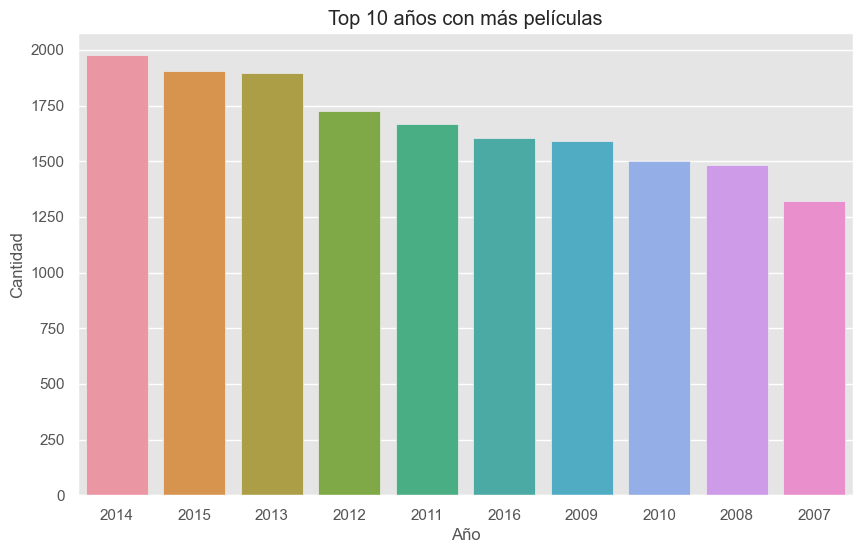

In [180]:
top_10_years = df_merged['release_year'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_years.index, y=top_10_years.values, order=top_10_years.index)
ax.set_title('Top 10 años con más películas')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

plt.show()

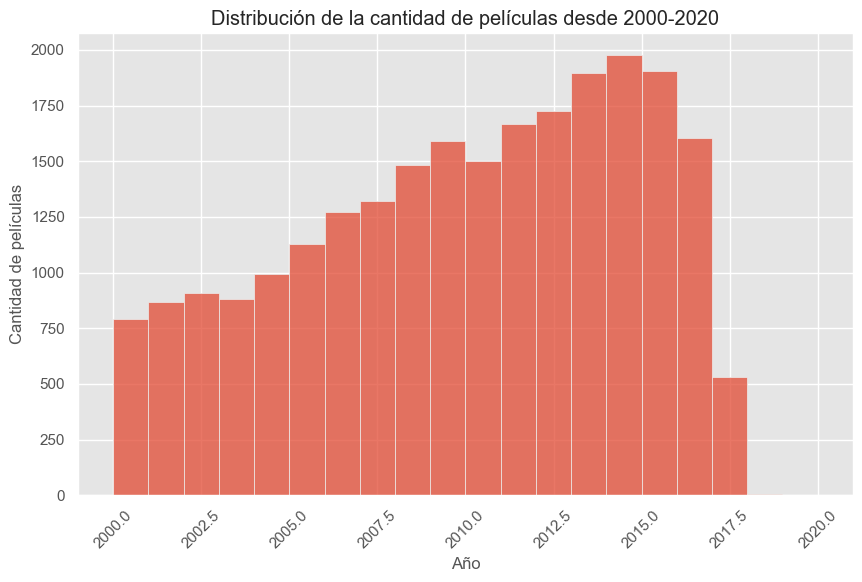

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='release_year', bins=range(2000, 2021))
plt.title('Distribución de la cantidad de películas desde 2000-2020')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()

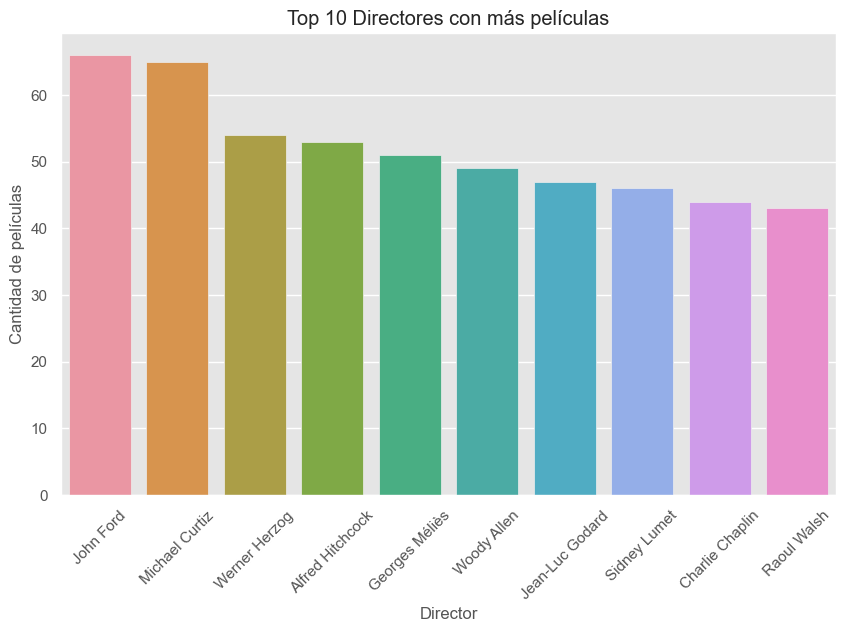

In [182]:
top_10_directors = df_merged['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
plt.title('Top 10 Directores con más películas')
plt.xlabel('Director')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()

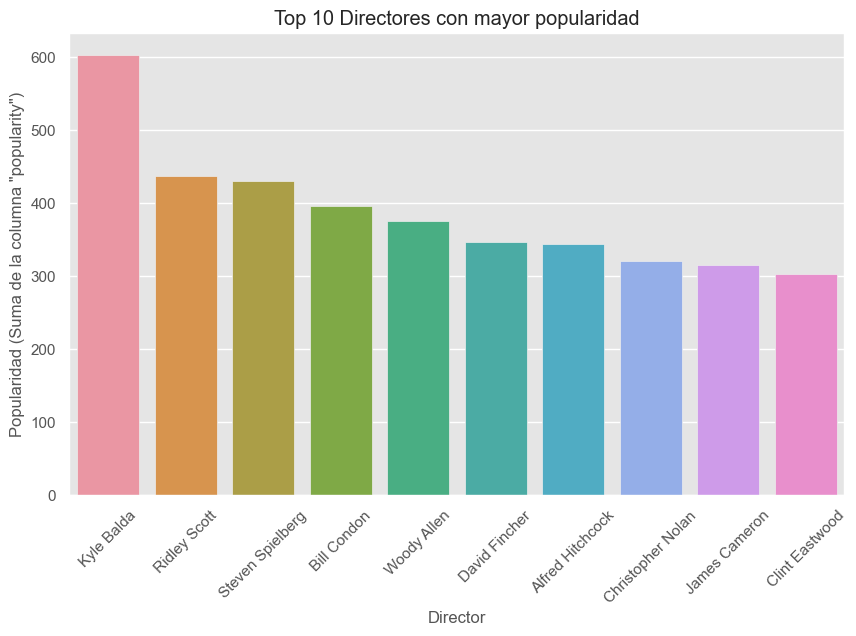

In [183]:
director_popularity = df_merged.groupby('director')['popularity'].sum()
sorted_directors = director_popularity.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_directors.index[:10], y=sorted_directors.values[:10])
plt.title('Top 10 Directores con mayor popularidad')
plt.xlabel('Director')
plt.ylabel('Popularidad (Suma de la columna "popularity")')
plt.xticks(rotation=45)
plt.show()


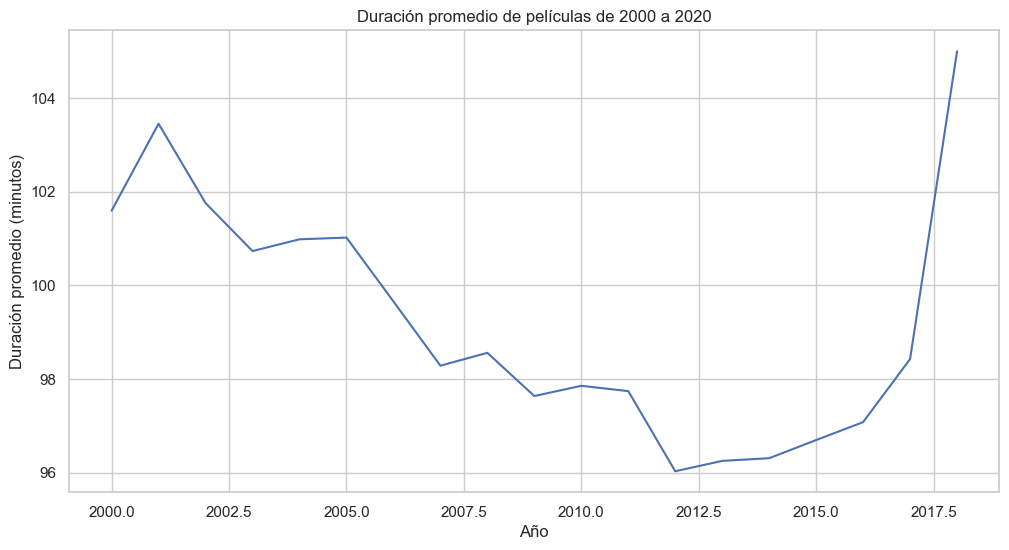

In [184]:
# Filtra los valores de duración igual a 0 y limita los años al rango de 2000 a 2020
df_filtered = df_merged[(df_merged['runtime'] > 0) & (df_merged['release_year'].between(2000, 2020))]

# Agrupa y calcula la duración promedio de las películas por año
df_avg_duration = df_filtered.groupby('release_year')['runtime'].mean().reset_index()

# Configura el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de línea utilizando Seaborn y Matplotlib
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_duration, x='release_year', y='runtime', color='b')

# Configura los títulos y etiquetas de los ejes
plt.title('Duración promedio de películas de 2000 a 2020')
plt.xlabel('Año')
plt.ylabel('Duración promedio (minutos)')

# Muestra el gráfico
plt.show()

In [185]:
df_merged.dtypes

id                               object
title                            object
release_year                      int32
popularity                      float64
genres                           object
budget                          float64
revenue                         float64
ROI                               Int64
original_language                object
production_companies             object
production_countries             object
runtime                         float64
overview                         object
release_date             datetime64[ns]
spoken_languages                 object
status                           object
tagline                          object
vote_average                    float64
vote_count                      float64
belongs_to_collection            object
director                         object
dtype: object

---

## PASO 4: Relación de las características

- Scatterplot (Gráfico de dispersión)
- Heatmap Correlation (Mapa de calor de correlación)
- Pairplot (Gráfico de pares)
- Comparaciones de agrupación

In [186]:
# df.plot(kind='scatter', 
#         x='Speed_mph', 
#         y='Height_ft', 
#         title='Coaster Speed vs. Height')
# plt.show()

# Volviendo al ejemplo de las montanias, podemos hacer una comparacion entre Velocidad y Altura.
# Normalmente mientras mas alta la montania, mas rapida.
# Scatterplot

In [187]:
# ax = sns.scatterplot(x='Speed_mph', 
#                      y='Height_ft', 
#                      hue='Year_Introduced', 
#                      data=df)
# ax.set_title('Coaster Speed vs. Height')
# plt.show()

# Mismo pero con seaborn suele quedar mas lindo y tiene mas funciones

In [188]:
# sns.pairplot(df, 
#              vars=['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'], 
#              hue='Type_Main')
# plt.show()

# Podemos hacer un pairplot para comparar muchas columnas de una vez.
# Siempre con un HUE que tenga una caracteristica para comparar.
# Por ejemplo TIPO DE MONTANIA de acero, madera o plastico JAJAJA

In [189]:
# df_corr = df_merged[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()
# df_corr

# # Podemos buscar la maztriz de correlacion entre distintas caracteristicas(columnas)

In [190]:
#sns.heatmap(df_corr, annot=True)

# Tambien podemos crear un MAPA DE CALOR para decifrar mas intuitivamente las correlaciones

| Coeficiente de correlación positivo  | Coeficiente de correlación negativo | Coeficiente de correlación cercano a 0 |
| ------------- | ------------- | ------------- |
| Un valor cercano a 1 indica una correlación positiva, lo que significa que las variables tienden a aumentar o disminuir juntas. Por ejemplo, si dos variables tienen un coeficiente de correlación positivo alto, como 0.8, esto indica que cuando una variable aumenta, la otra variable también tiende a aumentar en la mayoría de los casos.  | Un valor cercano a -1 indica una correlación negativa, lo que significa que las variables tienden a moverse en direcciones opuestas. Por ejemplo, si dos variables tienen un coeficiente de correlación negativo alto, como -0.7, esto indica que cuando una variable aumenta, la otra variable tiende a disminuir en la mayoría de los casos. | Un valor cercano a 0 indica una correlación débil o ausencia de correlación lineal entre las variables. Esto significa que no hay una relación lineal clara entre las variables y su comportamiento no está directamente relacionado. |

**para recordar**

---

## Paso 5: Preguntas sobre los datos

- Tratar de responder una pregunta que tengas sobre los datos, usando una gráfica o estadística.

Por ejemplo: Cuales son las localidades con el las montanias rusas mas rapidas en promedio? (>= a 10 montanias)

In [191]:
# ax = df.query('Location != "Other"') \
#     .groupby('Location')['Speed_mph'] \
#     .agg(['mean','count']) \
#     .query('count >= 10') \
#     .sort_values('mean')['mean'] \
#     .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
# ax.set_xlabel('Average Coaster Speed')
# plt.show()

# Siguiendo el ejemplo de las montanias rusas podemos crear un barchart donde mostremos 
# 1. La cantidad de montanias por localidad y 2. La velocidad promedio de las montanias de esa localidad
# Funciones clave: query para filtrar, groupby para juntar localidad y velocidad, agg para hacer las operaciones
# sobre el groupby
# Agregamos el ['mean'] al final para que el plot solo muestre la serie de promedio.